In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import re

In [43]:
# Load the dataset
data1 = pd.read_csv('Resale_list1.csv')
data2 = pd.read_csv('Resale_list2.csv')
data3 = pd.read_csv('Resale_list3.csv')
data4 = pd.read_csv('Resale_list4.csv')
data5 = pd.read_csv('Resale_list5.csv')

In [44]:
# Overview of the dataset
data1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200
...,...,...,...,...,...,...,...,...,...,...
287191,1999-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,456000
287192,1999-12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988,408000
287193,1999-12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988,469000
287194,1999-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,440000


In [45]:
data2

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0
...,...,...,...,...,...,...,...,...,...,...
369646,2012-02,YISHUN,5 ROOM,212,YISHUN ST 21,10 TO 12,121.0,Improved,1985,476888.0
369647,2012-02,YISHUN,5 ROOM,758,YISHUN ST 72,01 TO 03,122.0,Improved,1986,490000.0
369648,2012-02,YISHUN,5 ROOM,873,YISHUN ST 81,01 TO 03,122.0,Improved,1988,488000.0
369649,2012-02,YISHUN,EXECUTIVE,664,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,705000.0


In [46]:
data3

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0
...,...,...,...,...,...,...,...,...,...,...
52198,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0
52199,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0
52200,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0
52201,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0


In [47]:
data4

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
...,...,...,...,...,...,...,...,...,...,...,...
37148,2016-12,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,Improved,2000,82,488000.0
37149,2016-12,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,1987,69,455000.0
37150,2016-12,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,1992,74,778000.0
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0


In [48]:
data5

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
194531,2024-11,YISHUN,5 ROOM,335C,YISHUN ST 31,07 TO 09,112.0,Improved,2015,90 years 01 month,700000.0
194532,2024-11,YISHUN,5 ROOM,511B,YISHUN ST 51,10 TO 12,113.0,Improved,2017,91 years 10 months,720000.0
194533,2024-11,YISHUN,5 ROOM,850,YISHUN ST 81,01 TO 03,122.0,Improved,1988,62 years 09 months,670000.0
194534,2024-11,YISHUN,EXECUTIVE,405,YISHUN AVE 6,04 TO 06,148.0,Maisonette,1988,62 years 10 months,855500.0


In [49]:
df = pd.concat([data1,data2,data3,data4,data5])
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
194531,2024-11,YISHUN,5 ROOM,335C,YISHUN ST 31,07 TO 09,112.0,Improved,2015,700000.0,90 years 01 month
194532,2024-11,YISHUN,5 ROOM,511B,YISHUN ST 51,10 TO 12,113.0,Improved,2017,720000.0,91 years 10 months
194533,2024-11,YISHUN,5 ROOM,850,YISHUN ST 81,01 TO 03,122.0,Improved,1988,670000.0,62 years 09 months
194534,2024-11,YISHUN,EXECUTIVE,405,YISHUN AVE 6,04 TO 06,148.0,Maisonette,1988,855500.0,62 years 10 months


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 940739 entries, 0 to 194535
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                940739 non-null  object 
 1   town                 940739 non-null  object 
 2   flat_type            940739 non-null  object 
 3   block                940739 non-null  object 
 4   street_name          940739 non-null  object 
 5   storey_range         940739 non-null  object 
 6   floor_area_sqm       940739 non-null  float64
 7   flat_model           940739 non-null  object 
 8   lease_commence_date  940739 non-null  int64  
 9   resale_price         940739 non-null  float64
 10  remaining_lease      231689 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 86.1+ MB


In [51]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,940739.000000,940739.000000,9.407390e+05
mean,95.686183,1988.418313,3.251278e+05
std,25.802357,10.805266,1.745527e+05
min,28.000000,1966.000000,5.000000e+03
25%,73.000000,1981.000000,1.950000e+05
50%,93.000000,1986.000000,3.000000e+05
75%,113.000000,1996.000000,4.210000e+05
max,366.700000,2021.000000,1.588000e+06


In [52]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [53]:
df_new = df.drop('month', axis = 1)

In [54]:
df_new['remaining_lease']

0                        NaN
1                        NaN
2                        NaN
3                        NaN
4                        NaN
                 ...        
194531     90 years 01 month
194532    91 years 10 months
194533    62 years 09 months
194534    62 years 10 months
194535    62 years 03 months
Name: remaining_lease, Length: 940739, dtype: object

In [55]:
df_new['remaining_lease'] = df_new['remaining_lease'].astype(str)
def total_months(i):
    match_years = re.search(r'(\d+)\s+years', i)
    match_months = re.search(r'(\d+)\s+months', i)
    years = int(match_years.group(1)) if match_years else 0
    months = int(match_months.group(1)) if match_months else 0
    return years * 12 + months

df_new['remaining_lease_months'] = df_new['remaining_lease'].apply(total_months)
df_final = df_new.drop('remaining_lease', axis = 1)


In [56]:
df_final

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease_months
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,0
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,0
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,0
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,0
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,0
...,...,...,...,...,...,...,...,...,...,...
194531,YISHUN,5 ROOM,335C,YISHUN ST 31,07 TO 09,112.0,Improved,2015,700000.0,1080
194532,YISHUN,5 ROOM,511B,YISHUN ST 51,10 TO 12,113.0,Improved,2017,720000.0,1102
194533,YISHUN,5 ROOM,850,YISHUN ST 81,01 TO 03,122.0,Improved,1988,670000.0,753
194534,YISHUN,EXECUTIVE,405,YISHUN AVE 6,04 TO 06,148.0,Maisonette,1988,855500.0,754


In [57]:
df_final['remaining_lease_months'] = df_final['remaining_lease_months'].replace(0, df_final['remaining_lease_months'].mean())

In [58]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_final['town_encoded'] = encoder.fit_transform(df_final['town'])
df_final['flat_type_encoded'] = encoder.fit_transform(df_final['flat_type'])
df_final['block_encoded'] = encoder.fit_transform(df_final['block'])
df_final['street_name_encoded'] = encoder.fit_transform(df_final['street_name'])
df_final['storey_range_encoded'] = encoder.fit_transform(df_final['storey_range'])
df_final['flat_model_encoded'] =  encoder.fit_transform(df_final['flat_model'])

In [59]:
df_final_encoded = df_final.drop(['town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model'], axis = 1)

In [60]:
df_final_encoded

,floor_area_sqm,lease_commence_date,resale_price,remaining_lease_months,town_encoded,flat_type_encoded,block_encoded,street_name_encoded,storey_range_encoded,flat_model_encoded
0,31.0,1977,9000.0,184.861588,0,0,833,13,5,7
1,31.0,1977,6000.0,184.861588,0,0,833,13,2,7
2,31.0,1977,8000.0,184.861588,0,0,833,13,5,7
3,31.0,1977,6000.0,184.861588,0,0,833,13,4,7
4,73.0,1976,47200.0,184.861588,0,2,450,13,2,20
...,...,...,...,...,...,...,...,...,...,...
194531,112.0,2015,700000.0,1080.000000,26,4,953,572,4,9
194532,113.0,2017,720000.0,1102.000000,26,4,1539,575,5,9
194533,122.0,1988,670000.0,753.000000,26,4,2430,579,0,9
194534,148.0,1988,855500.0,754.000000,26,5,1121,562,2,15


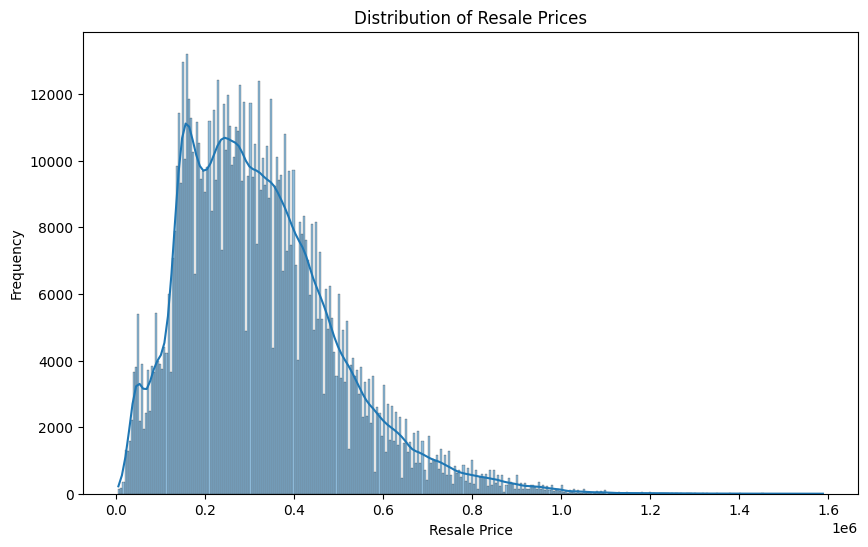

In [61]:
# Visualizing the distribution of resale prices
plt.figure(figsize=(10, 6))
sns.histplot(df_final_encoded['resale_price'], kde=True)
plt.title('Distribution of Resale Prices')
plt.xlabel('Resale Price')
plt.ylabel('Frequency')
plt.show()

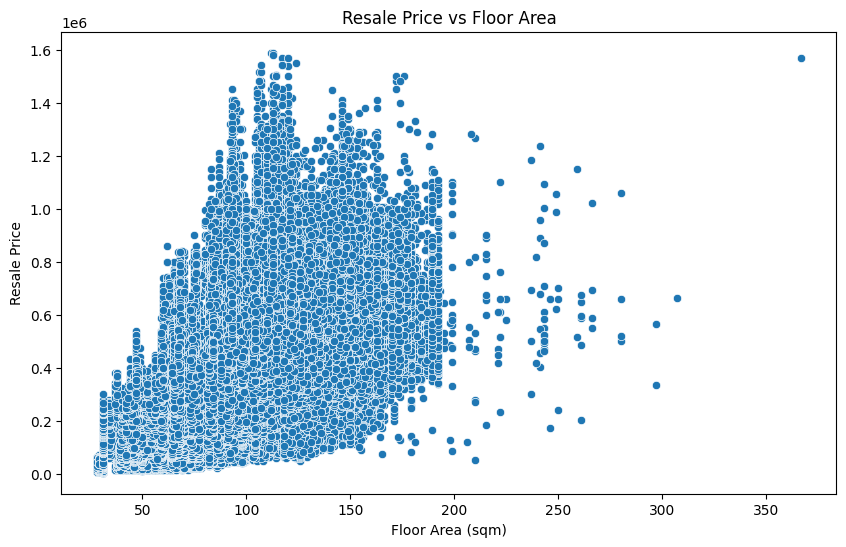

In [62]:
# Scatter plot of resale price against floor area
plt.figure(figsize=(10, 6))
sns.scatterplot(x='floor_area_sqm', y='resale_price', data=df_final_encoded)
plt.title('Resale Price vs Floor Area')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price')
plt.show()

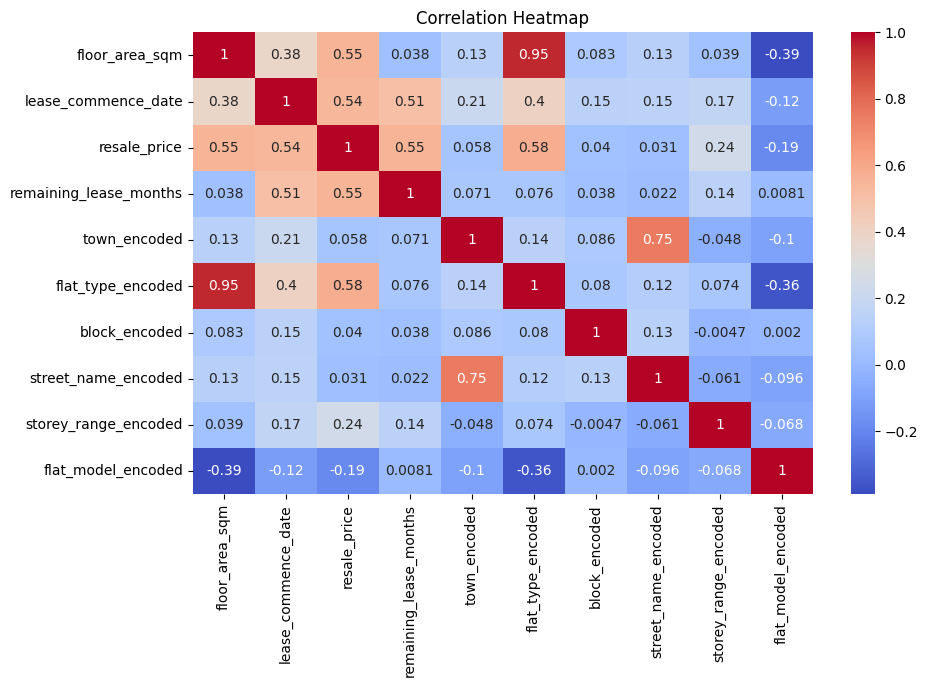

In [63]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_final_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

floor_area_sqm, lease_commence_date, remaining_lease_months and flat_type_encoded; all of these show some amount of correlation with resale_price

In [64]:
df_final_encoded.to_csv('Singapore_cleaned.csv', index = False)